# Wrangle and Analyze Data: WeRateDogs

## Project Outline:

**1. Data wrangling:**
- Gathering data
- Assessing data
- Cleaning data

**2. Storing, analyzing, and visualizing the wrangled data**

**3. Reporting**

## Introduction:

In this project, we are going to gather data from several different sources and in a variety of formats, assess their quality and tidiness, then clean them and also combine them all to create a master dataset which we’ll then use to answer interesting questions through analysis and produce stunning visualization and/or modeling using Python and its libraries.

The dataset that we will be wrangling, analyzing and visualizing is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. 

**WeRateDogs** is a **Twitter account** that rates people's dogs with a humorous comment about the dog. These ratings always have a denominator of 10. The numerators is always greater than 10: 11/10, 12/10, 13/10, etc. because "they're good dogs Brent". WeRateDogs has over 4 million followers and has received international media coverage.

The **Twitter archive** of WeRateDogs contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. Of the 5000+ tweets, we have filtered for tweets with ratings only because not all 5000+ tweets are dog ratings and some are retweets. So there are about 2356 tweets.

The data was extracted programmatically from each tweet's text, but the ratings as well as dog names and dog stages probably aren't all correct. So, we'll need to assess and clean these columns in order to use them for analysis and visualization.
There is also additional data, which include retweet count and favorite count, can be also gathered programmatically from **Twitter's API** using **Tweepy Library in Python**

After having ran every image in the **WeRateDogs Twitter archive** through a **neural network** that can classify breeds of dogs, the output is a table full of **image predictions** (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Our next step is that all of this additional data will need to be gathered, assessed, and cleaned.

## Step 1. Gathering Data:

The first step in our data wrangling process is gathering data from several different sources and file formats such as: 
- The WeRateDogs Twitter Archive, which is a cvs file that contains the tweet for each dog's name, its rating and development stage.
- The Tweet Image Prediction, which is what breed of dog is in each tweet according to a neural network.
- The Twitter's API and JSON data, which will be used to gather retweet count and favorite count ( two missing columns in the Twitter Archive).  

In [44]:
#Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json 
import time
import datetime

### 1. The WeRateDogs Twitter Archive:

In [45]:
# Display WeRateDogs Twitter Archive
twitter_arch = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [46]:
twitter_arch.shape

(2356, 17)

- **tweet_id** which is the unique identifier for each tweet
- **timestamp** which is the time when this Tweet was created
- **source** takes the form of an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text** is the actual UTF-8 text of the status update
- **rating_numerator** is the numerator of the rating of a dog which should be always greater than 10
- **rating_denominator** is the denominator of the rating of a dog which should be always a multiple of 10
- **name** is the name of the dog
- The four **dog stages** are **doggo**, **floofer**, **pupper**, and **puppo**

As already mentioned in the introduction, there are about 2356 tweets which represents the name of dogs, their breeds and also their ratings, etc.

### 2. The Tweet Image Prediction:

After having imported correctly the WeRateDogs Twitter Archive file into our DataFrame, we are going use **Web Scraping** to extract programmatically the **Tweet Image Prediction** which is hosted on Udacity's servers by using the **Requests and OS library** and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

The tweet image predictions represents what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [47]:
# Download the Tweet image prediction file 
file_name = 'image-predictions.tsv'

if not os.path.isfile(file_name): 
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)    

In [48]:
# Save the url to the Tweet image prediction file 
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [49]:
# Display the Tweet Image Prediction
image_pred = pd.read_csv('image-predictions-3.tsv' , sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
image_pred.shape

(2075, 12)

- **tweet_id** is the unique identifier for each tweet
- **jpg_url** is dog's image URL
- **img_num** is the image number that corresponded to the most confident prediction which is numbered from 1 to 4 since tweets can have up to 4 images
- **p1** is the algorithm's #1 prediction for the image in the tweet
- **p1_conf** refers to how confident the algorithm is in its #1 prediction
- **p1_dog** refers to whether or not the #1 prediction is a breed of dog
- **p2** is the algorithm's #2 prediction for the image in the tweet
- **p2_conf** represents to how confident the algorithm is in its #2 prediction
- **p2_dog** refers to whether or not the #2 prediction is a breed of dog
- **p3** is the algorithm's #3 prediction for the image in the tweet
- **p3_conf** refers to how confident the algorithm is in its #3 prediction
- **p3_dog** is whether or not the #3 prediction is a breed of dog

### 3. The Twitter's API and JSON:

Next, we are going to use **Twitter API** to import tweets into our DataFrame.

As each tweet's retweet count and favorite ("like") count at minimum, we are going to use the **tweet IDs** in the WeRateDogs Twitter archive, and then **query the Twitter API** for each **tweet's JSON data** using **Python's Tweepy library** and finally **store each tweet's entire set of JSON data** in a file called **tweet_json.txt file**. 

The Twitter API is one that requires users to be authorized to use it. This means that before we can run the appropriate API querying code, we need to set up our own Twitter application. Once we have our Twitter account and Twitter app set up, the following code, which is provided in the Getting started portion of the Tweepy documentation, will create an API object that we can use to gather Twitter data.

In [51]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [52]:
# Query the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

Then in this code block we have to isolate the json part of each tweepy status object that we have downloaded and we add them all into a list called: my_list_of_dicts and then we write this list into a txt file: tweet_json.txt. The next step is to create a DataFrame from the tweet_json.txt file:

In [86]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
list_of_tweets = []
missing_tweets = [] # list of the tweets that can't be found are saved in the list

start_time = time.time() # calculate the time of execution

for tweet_id in twitter_arch['tweet_id']: 
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        list_of_tweets.append(api.get_status(tweet_id))
        print("Success"),
    except Exception as e:
        missing_tweets.append(tweet_id)
print('End reached.')

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513
Su

Rate limit reached. Sleeping for: 702


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Rate limit reached. Sleeping for: 792


Success
1362: 703079050210877440
Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
1365: 702899151802126337
Success
1366: 702684942141153280
Success
1367: 702671118226825216
Success
1368: 702598099714314240
Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
1371: 702321140488925184
Success
1372: 702276748847800320
Success
1373: 702217446468493312
Success
1374: 701981390485725185
Success
1375: 701952816642965504
Success
1376: 701889187134500865
Success
1377: 701805642395348998
Success
1378: 701601587219795968
Success
1379: 701570477911896070
Success
1380: 701545186879471618
Success
1381: 701214700881756160
Success
1382: 700890391244103680
Success
1383: 700864154249383937
Success
1384: 700847567345688576
Success
1385: 700796979434098688
Success
1386: 700747788515020802
Success
1387: 700518061187723268
Success
1388: 700505138482569216
Success
1389: 700462010979500032
Success
1390: 700167517596164096
Success
1391: 700151421916807169
Success
13

Rate limit reached. Sleeping for: 791


Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
18

Rate limit reached. Sleeping for: 788


Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
23

In [101]:
print("The list of tweets", len(list_of_tweets))
print("The list of missing tweets", len(missing_tweets))

The list of tweets 2331
The list of missing tweets 25


In [102]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [103]:
#we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [104]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [105]:
# Change the name of the id column to tweet_id
tweet_json = tweet_json.rename(columns = {'id': 'tweet_id'})
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34997,7345,8977861,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30302,5480,8977861,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3624,8977861,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38257,7532,8977861,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36502,8112,8978431,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [106]:
# Save the dataFrame in file
tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [107]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


- **id** refers to the unique identifier for each tweet
- **retweet_count** is the number of times this Tweet has been retweeted
- **favorite_count** indicates approximately how many times this Tweet has been liked by Twitter users

Note that each tweet's entire set of JSON data is stored in **tweet_json.txt** file, and also each tweet's JSON data is written to its own line and the **tweet_json.txt** file is read line by line into a pandas DataFrame.

After having gathered data from **twitter-archive-enhanced.csv**, and downloading **image-predictions.tsv** from internet unsing requests library and then querying an API **tweet_json.txt** using Tweepy library, we are going to start the next step in our data wrangling process which is **Assessing Data**.

## Step 2. Assessing Data:

After gathering the data, the three tables which are **twitter_archive**, **image_prediction** and **tweet_json** were saved and assessed Visually and Programmatically to identify data quality issues.

### 1. Visual assessment:

In [108]:
# Display first 5 rows of the dataframe
twitter_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [109]:
# Display last 5 rows of the dataframe
twitter_arch.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [110]:
# Display the image prediction table
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [112]:
# Display the tweet data table
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34997,7345,8977861,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30302,5480,8977861,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3624,8977861,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38257,7532,8977861,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36502,8112,8978431,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


Through Visual Assessment, we conclude that:
- There are some quality issues such as NaN and missing values in the twitter_archive table, while in the image prediction table there are some dogs' name in lowercase and others in uppercase. 
- The column text had multiple variables like a url link, rating, and some tweets represented two dogs.
- The tweet_count and archive table should be merged as this is related data.
- There are also non-descriptive column headers and duplicates that should be documented and then cleaned.

### 2. Programmatic assessment:

#### 2.1 Twitter Archive DataFrame:

In [113]:
# View a sample of data
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1476,693629975228977152,NaN,NaN,2016-01-31 03:00:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper is afraid of its own feet. 12/10 would comfort https://t.co/Tn9Mp0oPoJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/693629975228977152/photo/1,https://twitter.com/dog_rates/status/693629975228977152/photo/1",12,10,None,None,None,pupper,None
1535,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555533848577/photo/1,12,10,None,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None
924,755206590534418437,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1",14,10,one,doggo,None,None,None
1517,690938899477221376,NaN,NaN,2016-01-23 16:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","She thought the sunset was pretty, but I thought she was prettier. 10/10 https://t.co/HSL3mnP5NX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690938899477221376/photo/1,10,10,None,None,None,None,None


In [114]:
# View info of twitter_archive DataFrame
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- tweet_id should be object instead of dtype int64 
- timestamp should be a datetime64 dtype type as well
- dogs' stage (doggo, floofer, pupper, and puppo) should be merged into one column

In [115]:
# View descriptive statistics of twitter_archive DataFrame
twitter_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Note that the minimum of both rating_numerator and rating_denominator is zero, while the maximum of rating respectively is 1,776 and 170.

As WeRateDogs has ratings almost always have a denominator of 10 and the numerators almost always greater than 10. 11/10, 12/10, 13/10, etc, we are going to check which numerator has a rating less than 10 as well as which denominator has a value of 0.

In [116]:
# Count the number of rating_numerator less than 10
twitter_arch[twitter_arch['rating_numerator'] < 10].count()[0]

440

In [117]:
# Check which tweet_id have numerator less than 10
twitter_arch[twitter_arch['rating_numerator'] < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [118]:
# Check which tweet_id have denominator with zero value
twitter_arch[twitter_arch['rating_denominator'] == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [119]:
# Check their respective text
twitter_arch.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [120]:
sum(twitter_arch.rating_denominator != 10)

23

In [121]:
sum(twitter_arch['tweet_id'].duplicated())

0

In [122]:
# Check for missing values
twitter_arch.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [123]:
# View number of entries for each source
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

The source column looks messy:
- There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should be split into 2 separate columns.
- The main source of twitter is iphone but the urls are not readable for human.

In [124]:
twitter_arch['text'].value_counts()

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55                        1
This is Aldrick. He looks wise af. Also exceptionally fluffy. Only two legs tho (unfortunate). 11/10 would still hug https://t.co/QwiCVLPMNL                        1
This is Beau. He's trying to keep his daddy from packing to leave for Annual Training. 13/10 and now I'm crying https://t.co/7JeDfQvzzI                             1
Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10 https://t.co/2BnCLtJMxD                          1
At first I thought this was a dog because of the sign, but it is clearly Wilson from Home Improvement. Please only send in dogs... 11/10 https://t.co/jqPk1BZ6xu    1
                                                                                                                                                                   ..
This

In [125]:
# Check missing information for each dog stages
doggo = twitter_arch.doggo.value_counts()
floofer = twitter_arch.floofer.value_counts()
pupper = twitter_arch.pupper.value_counts()
puppo = twitter_arch.puppo.value_counts()
print(doggo); print(floofer); print(pupper); print(puppo);

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


There are missing information for each dog stages.

In [126]:
twitter_arch.name.value_counts().head(20)

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
Lucy       11 
Tucker     10 
Penny      10 
Lola       10 
Bo         9  
Winston    9  
Sadie      8  
the        8  
Daisy      7  
an         7  
Toby       7  
Bailey     7  
Buddy      7  
Jax        6  
Koda       6  
Name: name, dtype: int64

"None" means that there are many missing names from the list, While "a", "Bo" and "an" might be the first letter of random names. 

#### 2.2 Image Prediction DataFrame:

In [127]:
# View a sample of image_predictions DataFrame
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
891,699370870310113280,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,1,cairn,0.337557,True,Chihuahua,0.209130,True,Border_terrier,0.136946,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True


Note that the dog breed name values in the p1, p2, and p3 columns are not consistantly stored. Some name are either in lowercase or in uppercase while others have wrong name such Siamese cat, bathtub, or hamster. Some dog breed name have underscores with should be replaced with spaces for better readability.

In [128]:
# Check if the tweet_id 740676976021798912 is for a Siamese cat
image_pred.loc[1197, 'jpg_url']

'https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg'

In [129]:
# Check out how to get Jupyter Notebook to show images
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg') 

This is definitely a dog not a Siamese cat.

In [130]:
# view the dimension of the dataset
image_pred.shape

(2075, 12)

In [131]:
# Display a basic summary of the DataFrame
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- There are no missing values as all variables have 2075 records.
- The tweet_id column should be object as dtype instead of int64.

In [132]:
# View descriptive statistics of image_predictions DataFrame
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [133]:
# check for duplicates
sum(image_pred.jpg_url.duplicated())

66

In [134]:
sum(image_pred['tweet_id'].value_counts())

2075

In [135]:
image_pred['img_num'].value_counts() 

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

#### 2.3 Tweet JSON DataFrame:

In [136]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
823,766423258543644672,5853,1528,8977863,16,Twitter for iPhone,Original tweet,https://t.co/Tytt15VquG
1765,677530072887205888,1010,217,8977887,16,Twitter for iPhone,Original tweet,https://t.co/DKe9DBnnHE
1664,681523177663676416,13684,5466,8977886,16,Twitter for iPhone,Original tweet,https://t.co/GQn2IopLud
999,746521445350707200,0,941,8977876,16,Twitter for iPhone,This is a retweet,This is a retweet
1912,673919437611909120,1095,342,8977891,16,Twitter for iPhone,Original tweet,https://t.co/cdwPTsGEAb


In [137]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


- There are no missing values as all variables have 2331 entries.

In [138]:
# display statistic basic summary 
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7307.338910,2586.027456,8.977880e+06,16.0
std,11350.229183,4374.456240,4.533227e+01,0.0
min,0.000000,1.000000,8.977861e+06,16.0
25%,1267.000000,524.500000,8.977861e+06,16.0
50%,3169.000000,1206.000000,8.977876e+06,16.0
75%,8937.000000,2993.000000,8.977887e+06,16.0
max,150409.000000,74216.000000,8.978458e+06,16.0


Taking a look at the describe output for the "tweet_data" table, we conclude that there is a gap of (1,206 - 524) 682 between 25% and 50% while it is much bigger of (2,993 - 1,206) 1,787 between 50% and 75% which suggests that there is a **massive skew** in the distribution.

In [139]:
# check for missing values
tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
friends_count       0
source              0
retweeted_status    0
url                 0
dtype: int64

Duplicate column names can be found more generally in Pandas, using the following code:

In [140]:
all_columns = pd.Series(list(twitter_arch) + list(image_pred) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
34    source  
dtype: object

### Quality Issues:

**Twitter Archive Table:**
- Q 1: There are 181 retweets as indicated by retweeted status id
- Q 2: Missing values in columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id.
- Q 3: tweet_id should be object instead of dtype int64
- Q 4: timestamp should be a datetime64 dtype type
- Q 5: Invalide dog names: "None", "a", "an", etc
- Q 6: Innacurate ratings: The number of rating numerator less than 10 are 440; 23 rating denominators are not equal to 10; and the tweet_id 835246439529840640 has a rating denominator with zero value. In addition, some ratings with decimals have been incorrectly exported.
- Q 7: There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should mention only the main source of both of them.

**Image Prediction Table:**
- Q 3: tweet_id should be object instead of dtype int64
- Q 8: Dog breed name values in the p1, p2, and p3 had some uppercase and lowercase letters.
- Q 9: Multiple columns containing the same type of data in the predictions table.
- Q 10:There are 66 jpg_url duplicates Image Predictions Table

**Tweet JASON Table:**
- Q 3: tweet_id should be object instead of dtype int64
- Q 11: There are duplicates in tweet_id in tweet_data_clean Table.
- Q12: Some additional work on our 3 DataFrames should be done for better redability and before merging them

### Tidiness issues:

- T 1: Dog stage data is separated into 4 columns (doggo, floofer, pupper, and puppo) which should be merged in one column
- T 2: All 3 tables are related by a commun key "tweet_id" and shouldn't be divided into separate DataFrame

## Step 3. Cleaning Data:

Cleaning data is the third step in data wrangling process. We are going to fix the quality and tidiness issues that we have identified in the assess step.

In [141]:
# Create DataFrame copies
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

In [142]:
twitter_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [143]:
image_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [144]:
tweet_json_clean.head(1)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34997,7345,8977861,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU


In [145]:
print(twitter_arch_clean.shape)
print(image_pred_clean.shape)
print(tweet_json_clean.shape)

(2356, 17)
(2075, 12)
(2331, 8)


### 1. Cleaning for Quality:

Programmatic data cleaning as its own separate process within data wrangling has 3 steps: **defining**, **coding** and **testing**. First of all, we'll define cleaning data plan in writing, then we'll translate it into code, and finally, we'll test the dataset often using code to make sure the cleaning code worked.

**Q 1:** There are 181 retweets as indicated by retweeted status id<br>
**Define:**  Remove all retweets from table  and keep only original tweets<br>
**Code:**

In [146]:
# Remove from table retweets and keep only original tweets
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_id.isnull()]
twitter_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


**Test:**

In [147]:
# Check no non-null entires are left
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**Q 2:** Missing values in columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id, expanded_urls.<br>
**Define:**  Remove columns that won't be used for analysis using drop() method<br>
**Code:**

In [148]:
# Drop related columns
twitter_arch_clean = twitter_arch_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                                        'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id', 'expanded_urls'])
twitter_arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None


In [149]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


Once the missing data and tidiness issues are cleaned, the next step is cleaning the remaining data quality issues. So, we are going to use a variety of common pandas functions to clean them all.

**Q 3:**  tweet_id should be object instead of dtype int64 <br>
**Define:**   Convert tweet_id from an integer to to object using the astype() function for all DataFrame.<br>
**Code:**

In [150]:
# Convert tweet_id from an integer to to object 
twitter_arch_clean['tweet_id'] = twitter_arch_clean['tweet_id'].astype('str')
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')

**Test:**

In [151]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


In [152]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [153]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


**Q 4:** timestamp should be a datetime64 dtype type <br>
**Define:** Convert Timestamps from object to datetime format using pandas to_datetime() function.<br>
**Code:**

In [154]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

In [155]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


**Q 5:** Invalide dog names: "None", "a", "an", etc <br>
**Define:**  Replace Invalide dog names with NaNs.<br>
**Code:**

In [156]:
# Check the number of invalid dog names
twitter_arch_clean['name'].value_counts().head(10)

None       680
a          55 
Lucy       11 
Charlie    11 
Cooper     10 
Oliver     10 
Tucker     9  
Penny      9  
Lola       8  
the        8  
Name: name, dtype: int64

In [157]:
# Convert invalide dog names with lower case letters to NaN
twitter_arch_clean = twitter_arch_clean.replace(regex = ['^[a-z]+', 'None'], value = np.nan)

**Test:**

In [158]:
# Check the number of null values in "name" column after conversion
sum(twitter_arch_clean.name.isnull())

784

In [159]:
twitter_arch_clean['name'].value_counts().head(10)

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker     9 
Penny      9 
Winston    8 
Lola       8 
Sadie      8 
Daisy      7 
Name: name, dtype: int64

In [160]:
twitter_arch_clean['name'].sample(10)

1858    NaN     
1633    Obi     
2148    Clarence
1245    NaN     
283     NaN     
1636    NaN     
975     Beau    
2112    NaN     
131     NaN     
2328    NaN     
Name: name, dtype: object

**Q 6:** Innacurate numerators and denominators ratings: Some ratings with decimals have been incorrectly exported <br>
**Define:**  Find all ratings that contained decimals and replace the numerators with the correct values.<br>
**Code:**

In [161]:
twitter_arch_clean = twitter_arch.copy()

In [162]:
# Obtain all text, indices, and ratings for tweets that contain a decimal in the numerator of rating

import re

ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_arch_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals          
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [163]:
# Print the index of text with decimal ratings
ratings_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [164]:
#Correctly converting the above decimal ratings to float
twitter_arch_clean.loc[ratings_decimals_index[0],'rating_numerator'] = float(ratings_decimals[0])
twitter_arch_clean.loc[ratings_decimals_index[1],'rating_numerator'] = float(ratings_decimals[1])
twitter_arch_clean.loc[ratings_decimals_index[2],'rating_numerator'] = float(ratings_decimals[2])
twitter_arch_clean.loc[ratings_decimals_index[3],'rating_numerator'] = float(ratings_decimals[3])
twitter_arch_clean.loc[ratings_decimals_index[4],'rating_numerator'] = float(ratings_decimals[4])

**Test:**

In [165]:
# Check contents of row with index 45 
twitter_arch_clean.loc[45]

tweet_id                      883482846933004288                                                                                                                      
in_reply_to_status_id         NaN                                                                                                                                     
in_reply_to_user_id           NaN                                                                                                                                     
timestamp                     2017-07-08 00:28:19 +0000                                                                                                               
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                          This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt94

In [166]:
# Check if the tweet_id 883482846933004288 is for Bella
image_pred_clean.loc[45, 'jpg_url']

'https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg'

In [167]:
from IPython.display import Image 
Image(url = ' https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg')

In [168]:
# Create a new column called rating, and calulate the value with new, standardized ratings
twitter_arch_clean['rating'] = twitter_arch_clean['rating_numerator'] / twitter_arch_clean['rating_denominator']

In [169]:
twitter_arch_clean.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [170]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None,1.2


**Q 7:** There are two variables in one column which violates the "each variable forms a column" requirement. There is "href" and also "rel" which should be split into 2 separate columns.<br>
**Define:** Optimize the source content by "Twitter for iphone", "Vine - Make a Scene", "Twitter Web Client", and "TweetDeck".<br>
**Code:**    

In [171]:
# Check how many sources
twitter_arch_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [172]:
# simpfy the source contexts
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_arch_clean['source'] = twitter_arch_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test:**

In [173]:
twitter_arch_clean['source'].value_counts()

Twitter for iphone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

**Q 8:** Dog breed name values in the p1, p2, and p3 had some uppercase and lowercase letters.<br>
**Define:** Capitalize the first letter of dog breed (p1, p2, and p3) for consistence.<br>
**Code:**      

In [174]:
image_pred_clean = image_pred.copy()

In [175]:
# View the number of dog breed name start with lowercase letters
image_pred_clean['p1'].str.islower().sum(), image_pred_clean['p1'].str.islower().sum(), image_pred_clean['p1'].str.islower().sum()

(1135, 1135, 1135)

In [176]:
# Change the strings to uppercase
image_pred_clean['p1'] = image_pred_clean['p1'].str.capitalize()
image_pred_clean['p2'] = image_pred_clean['p2'].str.capitalize()
image_pred_clean['p3'] = image_pred_clean['p3'].str.capitalize()

**Test:**

In [177]:
# Check for corrections
image_pred_clean['p1'].str.islower().sum()
image_pred_clean['p2'].str.islower().sum()
image_pred_clean['p3'].str.islower().sum()

0

In [178]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Q 9:** Multiple columns of dog breed (p1, p2, and p3) containing the same type of data in the predictions table.<br>
**Define:** Create one column for dog_breed and another one for confidence_list. Then we have to create a function where we keep the first true prediction along the confidence level as new columns.<br>
**Code:**  

In [179]:
# Create lists where the true prediction (p1, p2 or p3) will be stored in 
dog_breed = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_pred_clean):
    if image_pred_clean['p1_dog'] == True:
        dog_breed.append(image_pred_clean['p1'])
        confidence_list.append(image_pred_clean['p1_conf'])
    elif image_pred_clean['p2_dog'] == True:
        dog_breed.append(image_pred_clean['p2'])
        confidence_list.append(image_pred_clean['p2_conf'])
    elif image_pred_clean['p3_dog'] == True:
        dog_breed.append(image_pred_clean['p3'])
        confidence_list.append(image_pred_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
image_pred_clean.apply(image, axis=1)

# Create new columns
image_pred_clean['dog_breed'] = dog_breed
image_pred_clean['confidence_list'] = confidence_list

In [180]:
# Drop rows that has prediction_list 'error'
image_pred_clean = image_pred_clean[image_pred_clean['dog_breed'] != 'Error']

# Delete columns that won't be used for analysis
image_pred_clean = image_pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 
                                                      'p3', 'p3_conf', 'p3_dog'], 1)

**Test:**

In [181]:
# Check correction
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1751 non-null   int64 
 1   jpg_url          1751 non-null   object
 2   dog_breed        1751 non-null   object
 3   confidence_list  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


In [182]:
image_pred_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311


**Q 10:** There are 66 jpg_url duplicates in Image Predictions Table.<br>
**Define:** Drop 66 jpg_url duplicated.<br>
**Code:**  

In [183]:
# Delete duplicated jpg_url
image_pred_clean = image_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test:**

In [184]:
sum(image_pred_clean['jpg_url'].duplicated())

0

**Q 11:** There are duplicates in tweet_id in tweet_data_clean Table.<br>
**Define:** Drop the duplicates in tweet_id from tweet_data_clean.<br>
**Code:**  

In [185]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [186]:
tweet_json_clean['tweet_id'].shape

(2331,)

In [187]:
# Check for duplicates in tweet_id 
sum(twitter_arch_clean.tweet_id.duplicated()), sum(image_pred_clean.tweet_id.duplicated()), sum(tweet_json_clean.tweet_id.duplicated())

(0, 0, 0)

In [188]:
# drop the duplicates in tweet_id from tweet_data_clean
tweet_json_clean.drop_duplicates(subset = ['tweet_id'])

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34997,7345,8977861,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30302,5480,8977861,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3624,8977861,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38257,7532,8977861,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36502,8112,8978431,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,93,38,8977903,16,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,259,122,8977903,16,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,107,39,8977903,16,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,117,41,8977903,16,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [189]:
# confirm correction by rechecking for duplicates
sum(tweet_json_clean.duplicated())

0

In [190]:
tweet_json_clean.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
friends_count       0
source              0
retweeted_status    0
url                 0
dtype: int64

In [191]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


**Q 12:** Some additional work on our DataFrames should be done for better redability<br>
**Define:**  We have to set column width to infinite; then change the column names; and replace the underscores with spaces;  and finally reorder the column placement .<br> 
**Code:** 

In [192]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

C:\Users\Pattu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [193]:
twitter_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,1.3


In [194]:
# Drop unecessary columns
twitter_arch_clean = twitter_arch_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                                         'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator'])
                                                                          
# Confirm correction
twitter_arch_clean.head(0)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating


In [200]:
# Remove underscores from dog breed
image_pred_clean['dog_breed'] = image_pred_clean['dog_breed'] .replace("_", " ", regex = True)
image_pred_clean['dog_breed'] = image_pred_clean['dog_breed'] .str.title()

# Confirm correction
image_pred_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


In [201]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2356 non-null   object 
 1   timestamp  2356 non-null   object 
 2   source     2356 non-null   object 
 3   text       2356 non-null   object 
 4   name       2356 non-null   object 
 5   doggo      2356 non-null   object 
 6   floofer    2356 non-null   object 
 7   pupper     2356 non-null   object 
 8   puppo      2356 non-null   object 
 9   rating     2356 non-null   float64
dtypes: float64(1), object(9)
memory usage: 184.2+ KB


In [202]:
# Convert tweet_id from an integer to to object 
twitter_arch_clean['tweet_id'] = twitter_arch_clean['tweet_id'].astype('str')
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')

In [203]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2356 non-null   object 
 1   timestamp  2356 non-null   object 
 2   source     2356 non-null   object 
 3   text       2356 non-null   object 
 4   name       2356 non-null   object 
 5   doggo      2356 non-null   object 
 6   floofer    2356 non-null   object 
 7   pupper     2356 non-null   object 
 8   puppo      2356 non-null   object 
 9   rating     2356 non-null   float64
dtypes: float64(1), object(9)
memory usage: 184.2+ KB


In [204]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   object
 1   jpg_url          1691 non-null   object
 2   dog_breed        1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: object(4)
memory usage: 66.1+ KB


In [205]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


### 2. Cleaning for Tidiness:

After addressing missing data and quality issues first, cleaning for tidiness is the next step. <br>

**T 1:** Dog stage data is separated into 4 columns which should be merged in one column<br>
**Define:**  Extract dog stage from text column into the new dog_stage using pandas.Series.str.cat to concatenate strings in the Series and merge the 4 columns into one column: **dog_stage** and then drop the unrequired columns <br>
**Code:**

In [206]:
twitter_arch_clean[twitter_arch_clean['doggo'] == 'None'].head(1)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,None,None,None,1.3


In [207]:
# use a for loop to replace all the 'None' 
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in dog_stage:
        twitter_arch_clean[i] = twitter_arch_clean[i].replace('None', '')

In [208]:
# use pandas.Series.str.cat to combine the 4 columns
twitter_arch_clean['dog_stage'] = twitter_arch_clean.doggo.str.cat(twitter_arch_clean.floofer).str.cat(twitter_arch_clean.pupper).str.cat(twitter_arch_clean.puppo)

In [209]:
# Drop the unrequired columns
twitter_arch_clean = twitter_arch_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [210]:
# use np.nan to fill the empty
twitter_arch_clean['dog_stage'] = twitter_arch_clean['dog_stage'].replace('', np.nan)

In [211]:
twitter_arch_clean.head(5)

,tweet_id,timestamp,source,text,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,1.2,NaN


**Test:**

In [212]:
twitter_arch_clean.dog_stage.value_counts()

pupper          245
doggo           83 
puppo           29 
doggopupper     12 
floofer         9  
doggopuppo      1  
doggofloofer    1  
Name: dog_stage, dtype: int64

In [253]:
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
twitter_arch_clean.dog_stage.value_counts()

pupper            245
doggo             83 
puppo             29 
doggo, pupper     12 
floofer           9  
doggo, floofer    1  
doggo, puppo      1  
Name: dog_stage, dtype: int64

**T 2:** All 3 tables are related by a commun key "tweet_id" and shouldn't be divided into separate DataFrame<br>
**Define:**  Merge the twitter archive into the image predictions using Join Method, and merge the resulting DataFrame with Twitter JSON.<br>
**Code:** 

In [254]:
# Create a new dataframe that merge all 3 tables
We_Rate_Dogs = pd.merge(twitter_arch_clean, image_pred_clean, how = 'left', on = ['tweet_id'])
We_Rate_Dogs = pd.merge(We_Rate_Dogs, tweet_json_clean, how = 'left', on = ['tweet_id'])

# drop the duplicates due to join
We_Rate_Dogs = We_Rate_Dogs.drop_duplicates()

**Test:**

In [255]:
# Display the new DataFrame
We_Rate_Dogs.head(0)

,tweet_id,timestamp,source_x,text,name,rating,dog_stage,stage,jpg_url,dog_breed,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url


In [256]:
# Drop unecessary columns
We_Rate_Dogs = We_Rate_Dogs.drop(columns = ['followers_count', 'friends_count', 'source_x','source_y', 'retweeted_status', 'url'])

# Change the column names
We_Rate_Dogs.rename(columns={'dog_stage':'stage', 'dog_breed':'breed', 'confidence_list':'confidence'}, inplace = True)

**Test:**

In [257]:
# Confirm correction
We_Rate_Dogs.head(0)

,tweet_id,timestamp,text,name,rating,stage,stage,jpg_url,breed,confidence,favorite_count,retweet_count


In [258]:
We_Rate_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2356 non-null   object 
 1   timestamp       2356 non-null   object 
 2   text            2356 non-null   object 
 3   name            2356 non-null   object 
 4   rating          2356 non-null   float64
 5   stage           380 non-null    object 
 6   stage           12 non-null     object 
 7   jpg_url         1691 non-null   object 
 8   breed           1691 non-null   object 
 9   confidence      1691 non-null   object 
 10  favorite_count  2331 non-null   float64
 11  retweet_count   2331 non-null   float64
dtypes: float64(3), object(9)
memory usage: 239.3+ KB


In [259]:
# change dtype timestamp to datetime
We_Rate_Dogs['timestamp'] = pd.to_datetime(We_Rate_Dogs['timestamp'])

In [260]:
We_Rate_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   timestamp       2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   rating          2356 non-null   float64            
 5   stage           380 non-null    object             
 6   stage           12 non-null     object             
 7   jpg_url         1691 non-null   object             
 8   breed           1691 non-null   object             
 9   confidence      1691 non-null   object             
 10  favorite_count  2331 non-null   float64            
 11  retweet_count   2331 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(8)
memory usage: 239.3+ KB


In [261]:
# Reorder the column placement 
col_list = list(We_Rate_Dogs.columns)
print(col_list)

['tweet_id', 'timestamp', 'text', 'name', 'rating', 'stage', 'stage', 'jpg_url', 'breed', 'confidence', 'favorite_count', 'retweet_count']


In [262]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'name', 'stage','breed','rating', 'confidence','retweet_count', 'favorite_count',
              'text', 'jpg_url']

We_Rate_Dogs = We_Rate_Dogs[col_list]

# Confirm correction
We_Rate_Dogs.head(0)

,tweet_id,timestamp,name,stage,stage,breed,rating,confidence,retweet_count,favorite_count,text,jpg_url


This concludes the process of data wrangling: gathering data, assessing data and cleaning data. The next step is to analyze and visualize our data and communicate our findings.

## Step 4. Analysis and Visualization:

Before starting Analysis and Visualization of the dataset, we have to store our cleaned DataFrame into a new cvs file.

In [300]:
# Store the cleaned DataFrame to a new csv file
We_Rate_Dogs.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [301]:
# Create DataFrame copies
We_Rate_Dogs_Analysis = pd.read_csv('twitter_archive_master.csv')

In [302]:
# Display DataFrame
We_Rate_Dogs_Analysis.head()

,tweet_id,timestamp,name,stage,stage.1,breed,rating,confidence,retweet_count,favorite_count,text,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,NaN,NaN,NaN,1.3,NaN,7345.0,34997.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,NaN,NaN,Chihuahua,1.3,0.323581,5480.0,30302.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,NaN,NaN,Chihuahua,1.2,0.716012,3624.0,22790.0,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,NaN,NaN,Labrador Retriever,1.3,0.168086,7532.0,38257.0,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,NaN,NaN,Basset,1.2,0.555712,8112.0,36502.0,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [303]:
# Display a basic summary of the DataFrame
We_Rate_Dogs_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2356 non-null   int64  
 1   timestamp       2356 non-null   object 
 2   name            2356 non-null   object 
 3   stage           380 non-null    object 
 4   stage.1         12 non-null     object 
 5   breed           1691 non-null   object 
 6   rating          2356 non-null   float64
 7   confidence      1691 non-null   float64
 8   retweet_count   2331 non-null   float64
 9   favorite_count  2331 non-null   float64
 10  text            2356 non-null   object 
 11  jpg_url         1691 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 221.0+ KB


In [304]:
# view the dimension of the dataset
We_Rate_Dogs_Analysis.shape

(2356, 12)

In [305]:
# recheck for missing values
We_Rate_Dogs_Analysis.isnull().sum()

tweet_id          0   
timestamp         0   
name              0   
stage             1976
stage.1           2344
breed             665 
rating            0   
confidence        665 
retweet_count     25  
favorite_count    25  
text              0   
jpg_url           665 
dtype: int64

The next step is to start analysing and visualizing our dataset, and then drawing any valuable conclusions.

- Most popular dog breed
- Most frequent Dog stages
- Relationship between the number of retweet and favorite count
- Retweets and favorites over time

### 1. Most popular dog breed:

In [306]:
# import all necessary core packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [307]:
# drop NaN from Name and jpg_url 
nan_value = float("NaN")
We_Rate_Dogs_Analysis.replace("None", nan_value, inplace=True)
We_Rate_Dogs_Analysis.dropna(subset = ["name"], inplace=True)
We_Rate_Dogs_Analysis.dropna(subset = ["jpg_url"], inplace=True)

In [308]:
We_Rate_Dogs_Analysis['breed'].value_counts()

Golden Retriever           111
Pembroke                   75 
Labrador Retriever         75 
Chihuahua                  69 
Pug                        49 
                           .. 
Black-And-Tan Coonhound    1  
Irish Wolfhound            1  
Scotch Terrier             1  
Appenzeller                1  
Clumber                    1  
Name: breed, Length: 111, dtype: int64

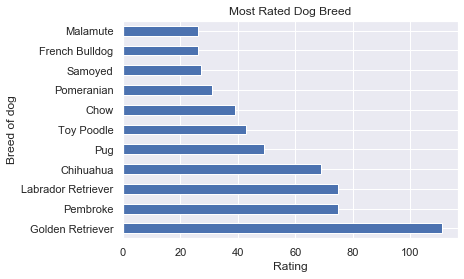

In [309]:
# scatterplot of dog breeeds
dog_breed = We_Rate_Dogs_Analysis.groupby('breed').filter(lambda x: len(x) >= 25)
dog_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Rating')
plt.ylabel('Breed of dog');

The most popular dog breed is a golden retriever (111), followed by labrador retriever and Pembroke (75), then comes Chihuahua in the third place (69).

In [310]:
# view the dog name with the highest rating
We_Rate_Dogs_Analysis.loc[We_Rate_Dogs_Analysis['rating'].idxmax()]

tweet_id          810984652412424192                                                                                                                                                       
timestamp         2016-12-19 23:06:23+00:00                                                                                                                                                
name              Sam                                                                                                                                                                      
stage             NaN                                                                                                                                                                      
stage.1           NaN                                                                                                                                                                      
breed             Golden Retriever                          

In [311]:
# Display the image of the most rated dog
from IPython.display import Image 
Image(url = '  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg')

In [312]:
# view the dog name with the lowest rating
We_Rate_Dogs_Analysis.loc[We_Rate_Dogs_Analysis['rating'].idxmin()]

tweet_id          678424312106393600                                                                                                                          
timestamp         2015-12-20 03:58:55+00:00                                                                                                                   
name              Crystal                                                                                                                                     
stage             NaN                                                                                                                                         
stage.1           NaN                                                                                                                                         
breed             Maltese Dog                                                                                                                                 
rating            0.2                         

In [313]:
# Display the image of the lowest rated dog
from IPython.display import Image 
Image(url = '   https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg')

### 2. Most frequent Dog stages:

In [314]:
We_Rate_Dogs_Analysis['stage'].value_counts()

pupper           103
doggo            33 
puppo            15 
floofer          5  
doggo, pupper    4  
Name: stage, dtype: int64

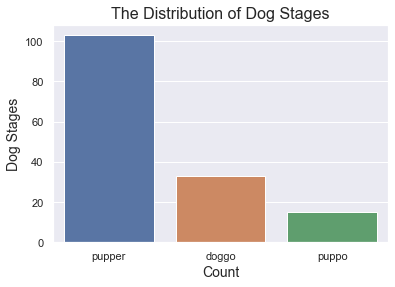

In [315]:
sorted_stage = We_Rate_Dogs_Analysis['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = We_Rate_Dogs_Analysis, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16);

Pupper is the most frequent reported dog stage (103), followed by doggo (33), puppo (15) and floofer (5).

### 3. Relationship between the number of retweet and favorite count:

In [316]:
# create the function of correlation coefficient 
def correlation_coeff(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

In [317]:
# correlation between retweet_count and favorite count
correlation_coeff( We_Rate_Dogs_Analysis['retweet_count'],  We_Rate_Dogs_Analysis['favorite_count'])

0.8051197661032812

The coefficient of correlation between the number of retweet and favorite count is positive and it is around 0.81 which means that a dog breed with the highest retweet tends to have higher favorite account.

C:\Users\Pattu\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


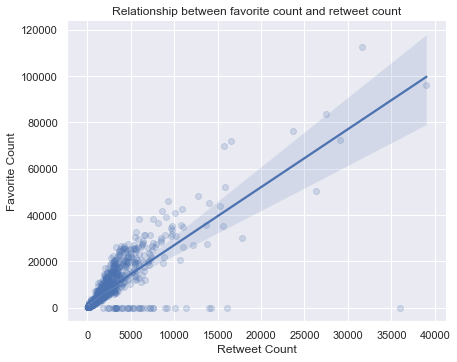

In [318]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", y="favorite_count", data= We_Rate_Dogs_Analysis, size = 5, aspect=1.3, scatter_kws={'alpha':1/5})
plt.title('Relationship between favorite count and retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

### 4. Retweets and favorites over time:

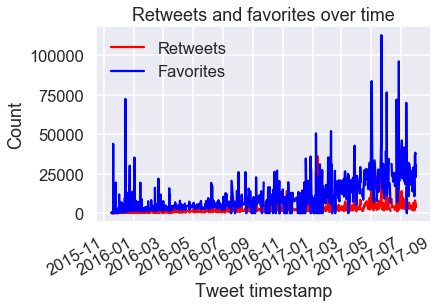

In [330]:
We_Rate_Dogs_Analysis['retweet_count'].plot(color = 'red', label='Retweets')
We_Rate_Dogs_Analysis['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

We can conclude that favorite counts are higher than retweets and their trends are increasing over time.
It worth noting that the he highest ratings do not receive the most retweets.

### References:

WeRateDogs Twitter: https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor

Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

30 Days of Python - Day 21 - Twitter API with Tweepy - Python TUTORIAL: https://www.youtube.com/watch?v=dvAurfBB6Jk